<a href="https://colab.research.google.com/github/NodiraTillayeva/Data-Science-Roadmap/blob/main/EPAM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive stats

* counts
* means
* maximums and minimum
* range (maximum * minimum)
* median
* IQR
* deviation

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Set visualisation settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [49]:
url = '/content/bank-additional-full.csv'
data = pd.read_csv(url, delimiter=';')  # Adjust the delimiter if necessary

In [50]:
# Display the first few rows of the dataframe
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [51]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [52]:
data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


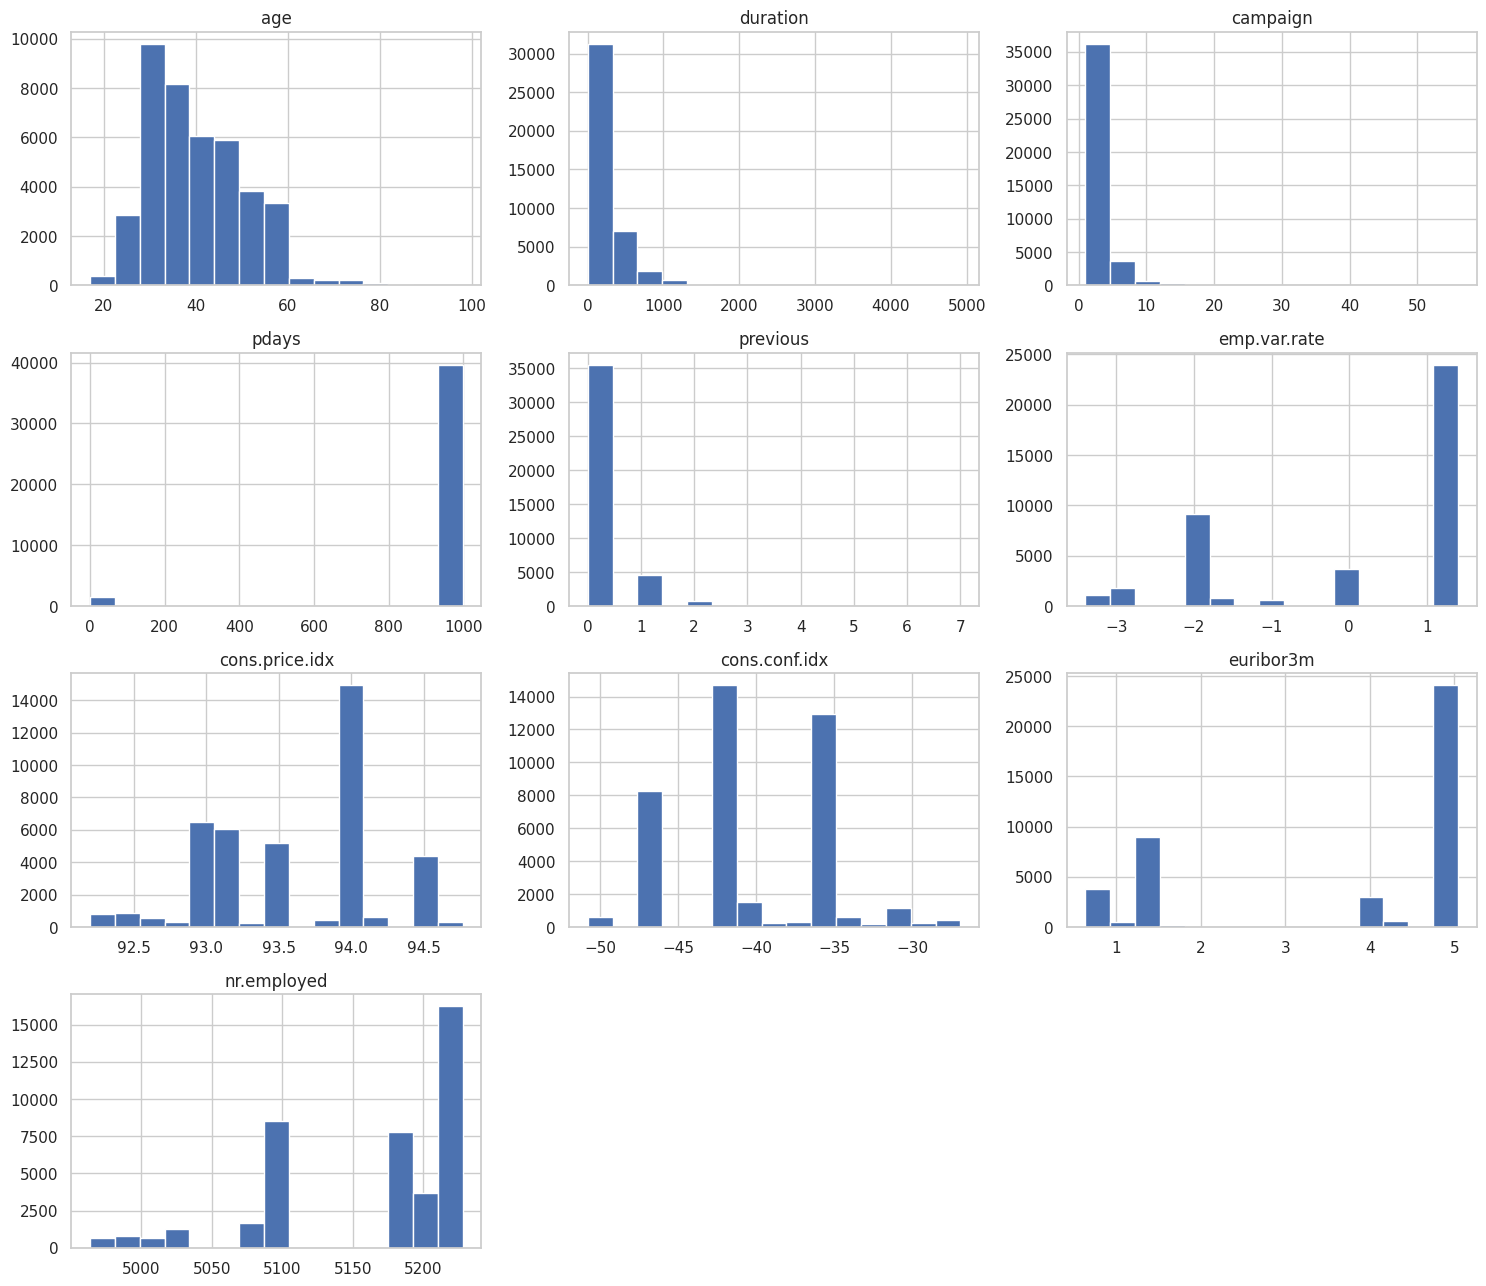

In [53]:
num_features = data.select_dtypes(include=[np.number]).columns.tolist()
data[num_features].hist(bins=15, figsize=(15, 13))
plt.tight_layout(pad=1.0)

In [54]:
# Checking for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

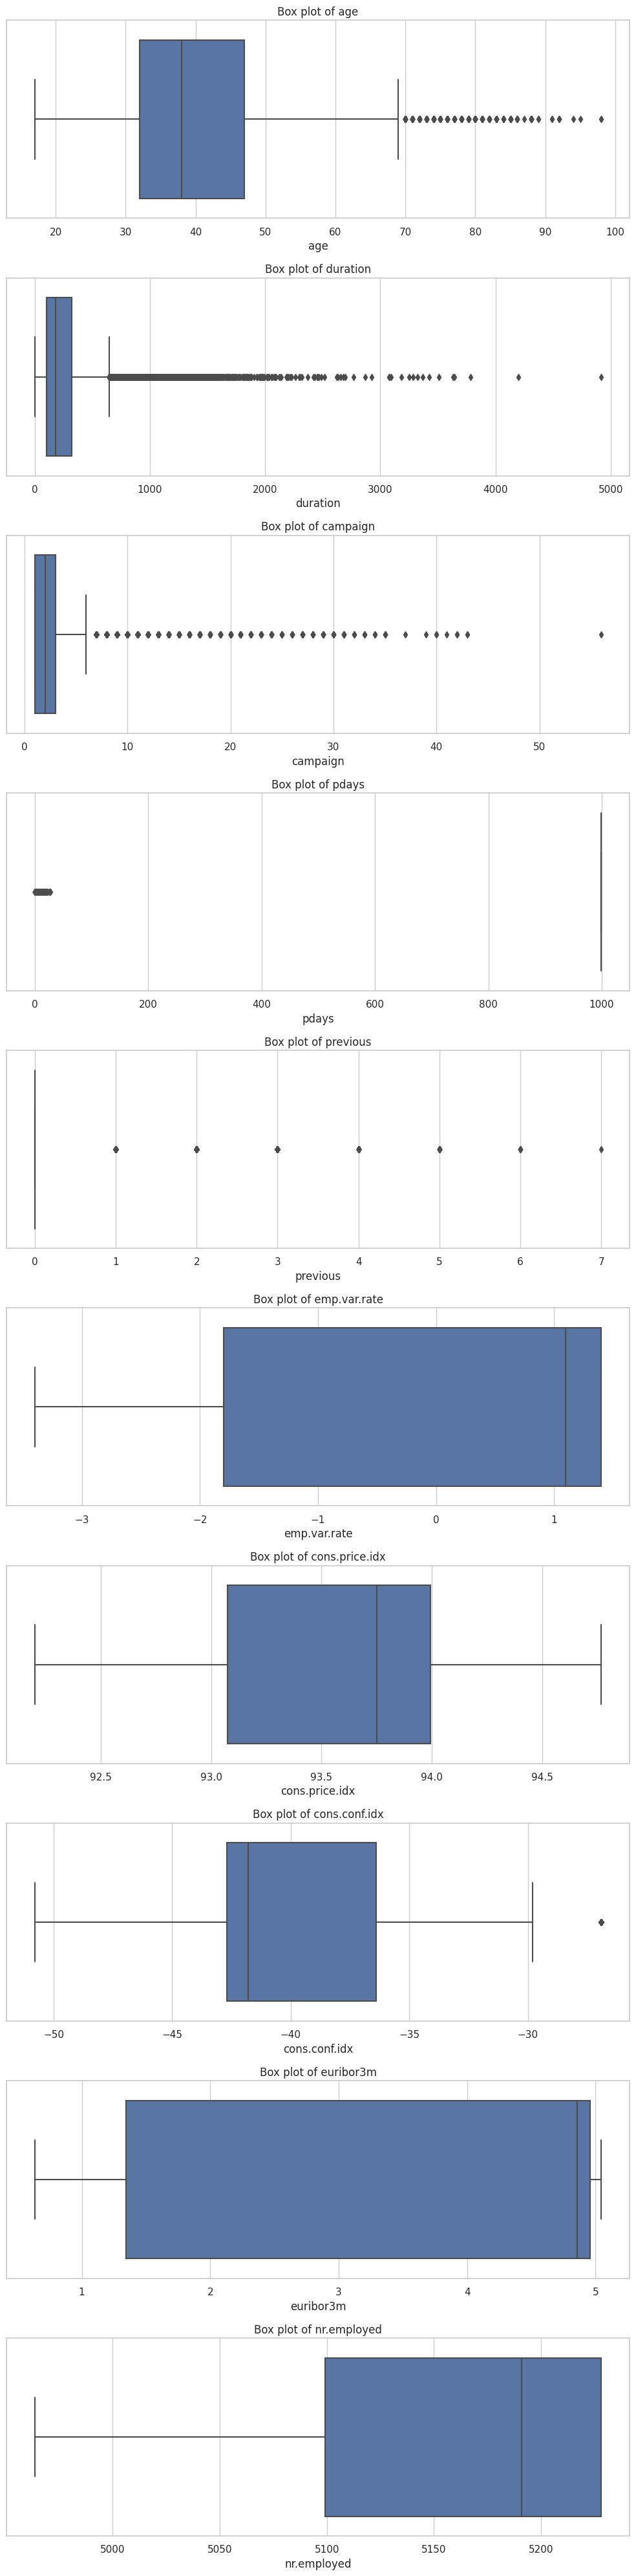

In [55]:
# Boxplots for detecting outliers
fig, ax = plt.subplots(len(num_features), 1, figsize=(10, len(num_features)*4))
for i, col in enumerate(num_features):
    sns.boxplot(x=data[col], ax=ax[i])
    ax[i].set_title('Box plot of ' + col)
plt.tight_layout()

In [56]:
# Print all column names
print(data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


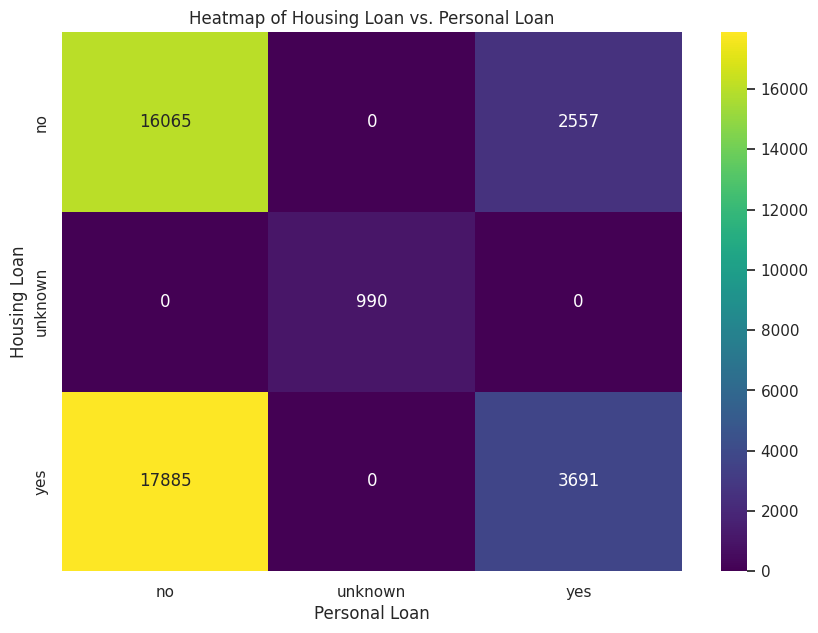

In [65]:
# Create a cross tabulation table
cross_tab = pd.crosstab(data['housing'], data['loan'])

# Create a heatmap from the cross tabulation
plt.figure(figsize=(10, 7))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Housing Loan vs. Personal Loan')
plt.ylabel('Housing Loan')
plt.xlabel('Personal Loan')
plt.show()

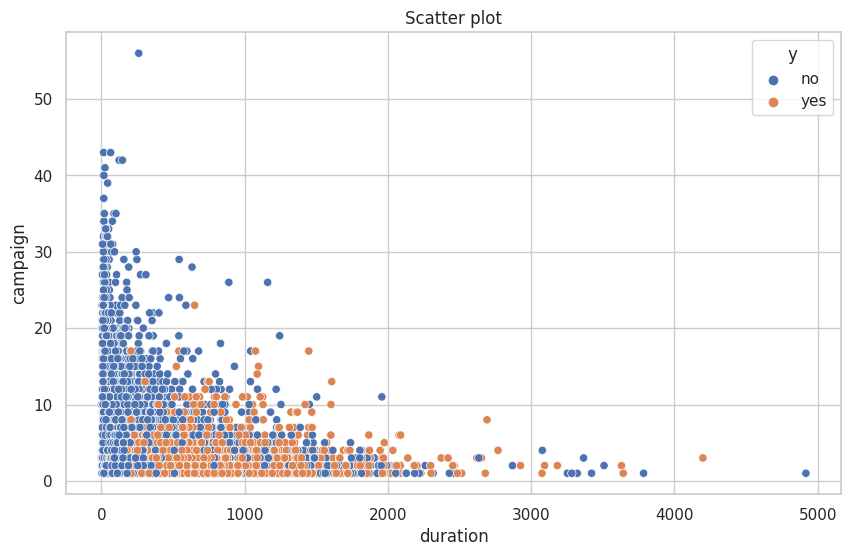

In [74]:
sns.scatterplot(data=data, x="duration", y="campaign", hue="y")
plt.title("Scatter plot")
plt.show()

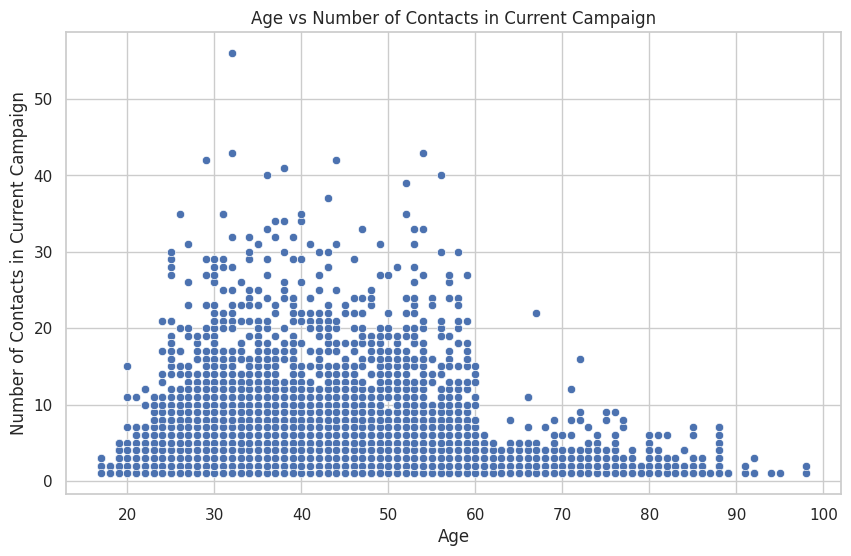

In [68]:
# Scatter plot for Age vs Campaign
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='campaign', data=data)
plt.title('Age vs Number of Contacts in Current Campaign')
plt.xlabel('Age')
plt.ylabel('Number of Contacts in Current Campaign')
plt.show()

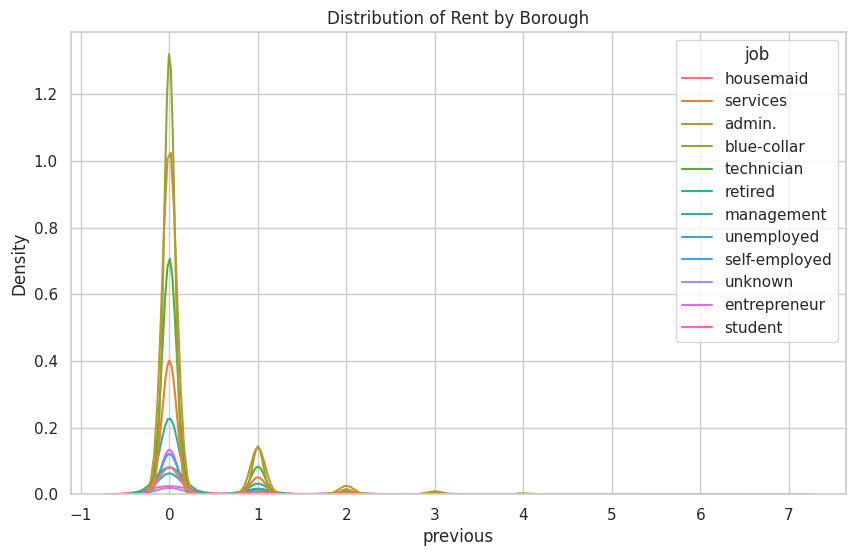

In [83]:
sns.kdeplot(data=data, x="previous", hue="job")
plt.title("Distribution of Rent by Borough")
plt.show()

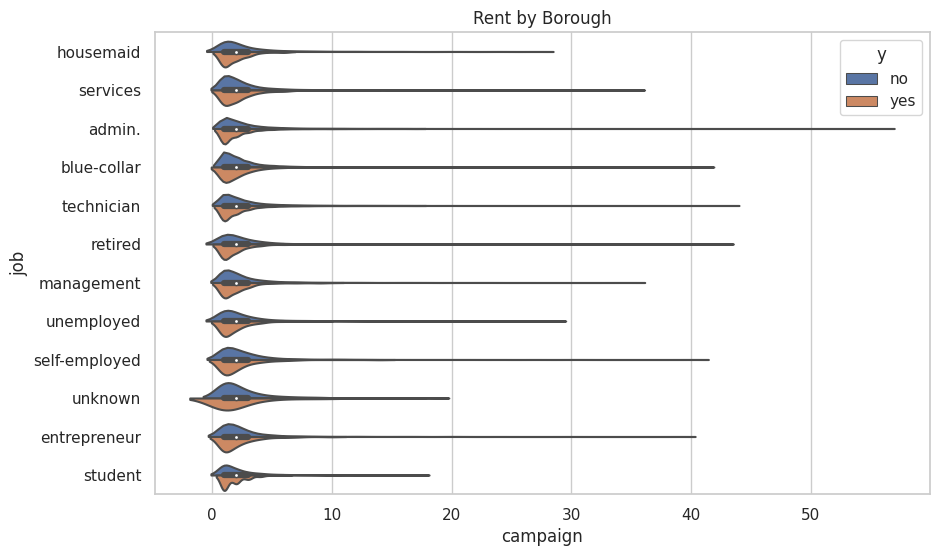

In [85]:
sns.violinplot(
    y="job",
    x="campaign",
    data=data,
    hue="y",
    split=True)
plt.title("Rent by Borough")
plt.show()

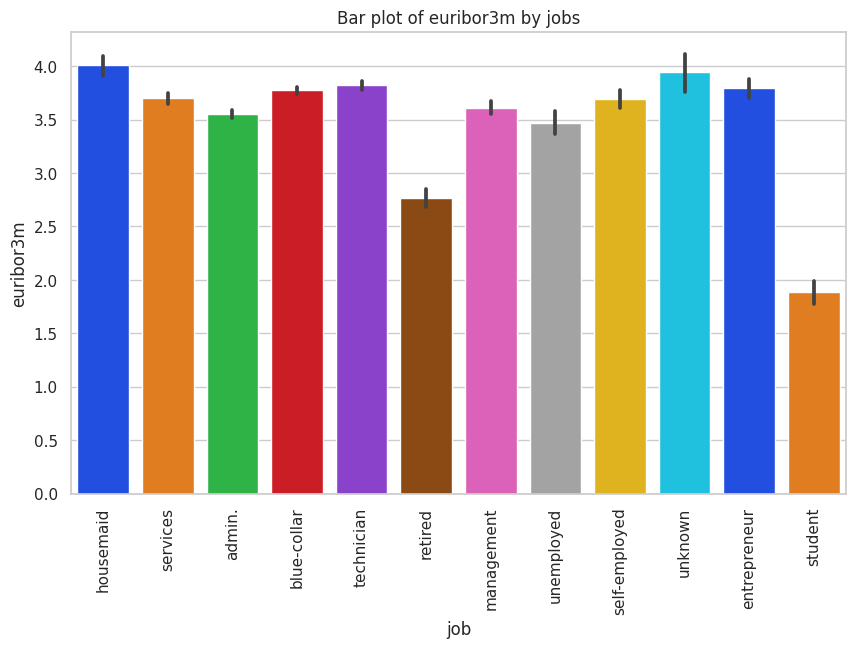

In [88]:
sns.barplot(x = "job", y="euribor3m", data=data, palette="bright")
plt.xticks(rotation = 90)
#hue="has_gym",
plt.title("Bar plot of euribor3m by jobs")
plt.show()